# 이미지 데이터 셋을 이용한 CNN Modeling
> # Github
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

In [2]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [3]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. wget From Github
* 'dogs_and_cats_small.zip' 파일 다운로드

In [4]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip

--2023-07-21 12:45:03--  https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90618980 (86M) [application/zip]
Saving to: ‘dogs_and_cats_small.zip’

dogs_and_cats_small 100%[===================>]  86.42M   389MB/s    in 0.2s    

2023-07-21 12:45:06 (389 MB/s) - ‘dogs_and_cats_small.zip’ saved [90618980/90618980]



* 다운로드 결과 확인

In [5]:
!ls -l

total 88500
-rw-r--r-- 1 root root 90618980 Jul 21 12:45 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Jul 18 13:43 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'dogs_and_cats_small.zip'

In [6]:
!unzip -q /content/dogs_and_cats_small.zip

* 학습 데이터 확인

In [7]:
!ls -l

total 88512
-rw-r--r-- 1 root root 90618980 Jul 21 12:45 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Jul 18 13:43 sample_data
drwxr-xr-x 4 root root     4096 Jul 21 12:45 test
drwxr-xr-x 4 root root     4096 Jul 21 12:45 train
drwxr-xr-x 4 root root     4096 Jul 21 12:45 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [8]:
train_dir = '/content/train'
valid_dir = '/content/validation'
test_dir  = '/content/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator

In [10]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [11]:
labels_batch

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1.], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

* 모델 학습방법 설정

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 13분

In [15]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 25s 117ms/step - loss: 0.6947 - accuracy: 0.5120 - val_loss: 0.6924 - val_accuracy: 0.4990
Epoch 2/60
100/100 [==============================] - 11s 115ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6930 - val_accuracy: 0.5120
Epoch 3/60
100/100 [==============================] - 11s 115ms/step - loss: 0.6794 - accuracy: 0.5760 - val_loss: 0.6509 - val_accuracy: 0.6100
Epoch 4/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6341 - accuracy: 0.6385 - val_loss: 0.7430 - val_accuracy: 0.5950
Epoch 5/60
100/100 [==============================] - 11s 115ms/step - loss: 0.6075 - accuracy: 0.6620 - val_loss: 0.7149 - val_accuracy: 0.6450
Epoch 6/60
100/100 [==============================] - 12s 124ms/step - loss: 0.5608 - accuracy: 0.7080 - val_loss: 0.5659 - val_accuracy: 0.7060
Epoch 7/60
100/100 [==============================] - 12s 124ms/step - loss: 0.4982 - accuracy: 0.7525 - val_loss: 0.5912 - val_ac

> ## 4) 학습 결과 시각화

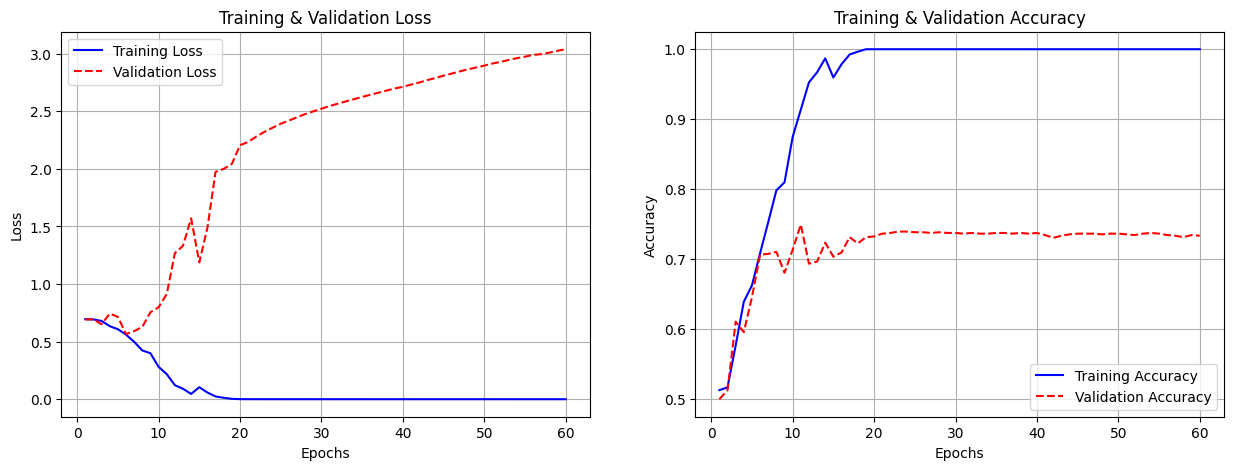

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [18]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.14676
Accuracy = 0.71700


#
#
#
# The End
#
#
#